In [8]:
import sys

import pandas as pd

sys.path.append("../airflow/plugins")

from db_connection import DbConnection
from domain_model import Instrument, Interval
from portfolio import Portfolio


In [2]:
db_connection = DbConnection.local_db_connection()
instrument = Instrument.get_instrument("SBER")
interval = Interval.hour_1
portfolio = Portfolio(db_connection, instrument, interval)

In [3]:
#trading_pnl = portfolio.get_trading_pnl()
#trading_pnl

In [4]:
total_pnl = portfolio.get_pnl()
total_pnl

,open,close,quantity,commission,trading_pnl,quantity_cum,mtm_pnl,total_pnl,total_pnl_cum
time_utc,,,,,,,,,
2024-12-02 06:00:00+00:00,237.02,237.85,-10.0,-1.18925,0.0,-10.0,NaN,NaN,NaN
2024-12-02 07:00:00+00:00,237.09,237.61,0.0,0.00000,0.0,-10.0,2.4,2.4,2.4
2024-12-02 08:00:00+00:00,237.64,237.00,0.0,0.00000,0.0,-10.0,6.1,6.1,8.5
2024-12-02 09:00:00+00:00,236.98,235.70,0.0,0.00000,0.0,-10.0,13.0,13.0,21.5
2024-12-02 10:00:00+00:00,235.72,235.70,0.0,0.00000,0.0,-10.0,-0.0,0.0,21.5
...,...,...,...,...,...,...,...,...,...
2024-12-06 11:00:00+00:00,233.89,235.89,-20.0,-2.33760,-42.6,-10.0,-20.4,-63.0,-13.2
2024-12-06 12:00:00+00:00,235.87,236.80,20.0,-2.36400,8.0,10.0,9.1,17.1,3.9
2024-12-06 13:00:00+00:00,236.80,237.02,-20.0,-2.36820,-4.0,-10.0,-2.2,-6.2,-2.3


In [6]:
total_pnl.to_csv("total_pnl.csv")

<Axes: >

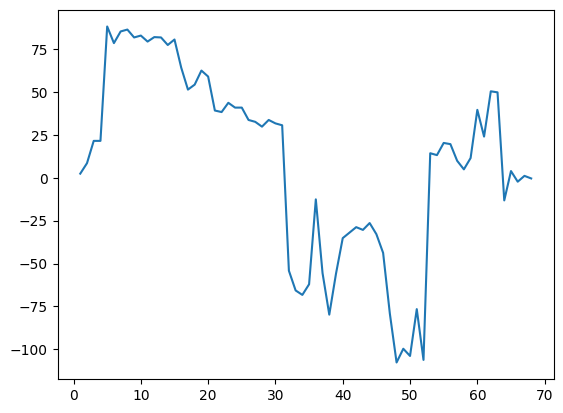

In [10]:
df = pd.read_csv("total_pnl.csv")
df["total_pnl_cum"].plot()